In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from typing import List
import numpy as np
import csv

def generate_data(
    len_: int, lambdas: List[float], amplitudes: List[float], shift: float, noise_sig: float, start: int = 0
):
    assert len(lambdas) == len(amplitudes), '"lambdas" and "amplitudes" have to have same lenght.'
    t = np.arange(start, start+len_)
    y = np.full(len_, shift)
    for lam, amp in zip(lambdas, amplitudes):
        wave = amp * np.sin(lam * t)
        y = y + wave
    y = y + noise_sig * np.random.randn(len_)
    return y

# Training dataset

## Generating

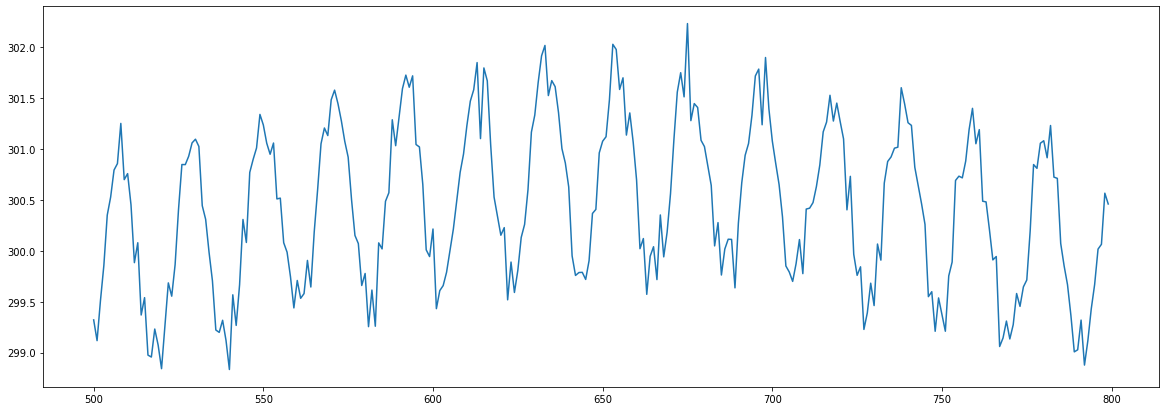

In [3]:
len_ = 5000
y = generate_data(len_=len_, lambdas=[0.3, 0.012], amplitudes=[1, 0.8], shift=300, noise_sig=0.2)

fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)
ax.plot(np.arange(len_), y);

## Saving dataset

In [24]:
with open('../data/Handmade/Sin/train/artificial_1.csv', "w") as f:
    writer = csv.writer(f)
    writer.writerows(np.expand_dims(y, axis=-1).tolist())

# Test dataset

## Generating

In [2]:
len_ = 8500
y_const = generate_data(start=5000, len_=len_, lambdas=[0.3, 0.012], amplitudes=[1, 1.5], shift=300, noise_sig=0.2)
a_seasonal_const = generate_data(start=7800, len_=500, lambdas=[0.3, 2*0.012], amplitudes=[1, 1.5], shift=300, noise_sig=0.2)

## Applying anomalies

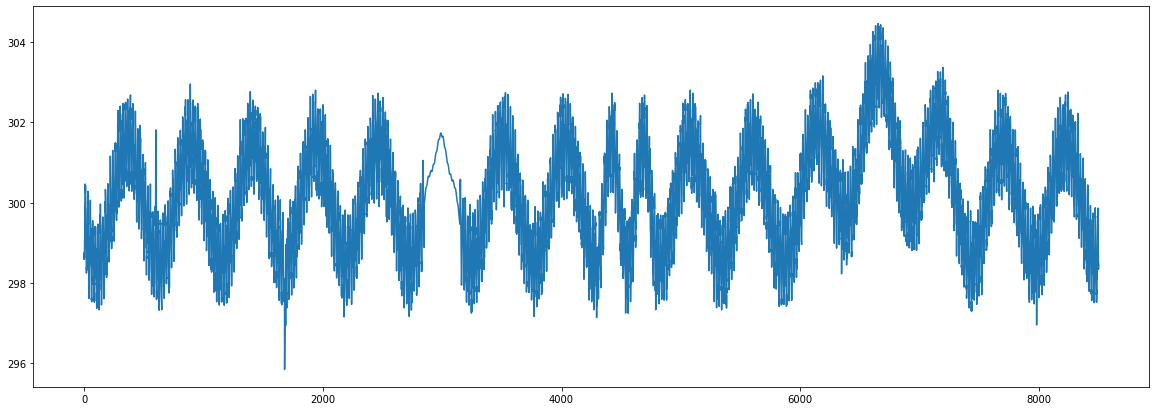

In [10]:
y = y_const.copy()

# Point anomalies
# global
y[1680:1690] += np.full(10, -2)
# contextual
y[600:605] += np.full(5, 2.5)

# Patter-wise anomalies
# shape
y[2850:3150] = generate_data(start=6800, len_=300, lambdas=[0.3, 0.05, 0.012], amplitudes=[0.04, 0.2, 1.5], shift=300, noise_sig=0.0)
# y[1800:2100] = np.concatenate([np.linspace(300, 301.5, 80), np.linspace(301.5, 302, 40), np.linspace(302, 301.7, 50), np.linspace(301.7, 299.5, 130)])
# seasonality
y[4300:4800] = a_seasonal_const
# trend
y[6000:6700] += np.linspace(0, 2, 700)
y[6700:7400] += np.linspace(2, 0, 700)
# y[7000:] += 2.5


fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)
ax.plot(np.arange(len_), y);

## Saving dataset

In [11]:
with open('../data/Handmade/Sin/test/artificial_1.csv', "w") as f:
    writer = csv.writer(f)
    writer.writerows(np.expand_dims(y, axis=-1).tolist())

## Saving data classes

In [119]:
classes = np.zeros(len_)
anom_ids = np.concatenate([
    np.arange(600, 605), np.arange(1680, 1690), np.arange(2850, 3150),
    np.arange(4300, 4800), np.arange(4300, 4800), np.arange(6000, 7400)
])
classes[anom_ids] = 1
with open('../data/Handmade/Sin/test_label/artificial_1.csv', "w") as f:
    writer = csv.writer(f)
    writer.writerows(np.expand_dims(classes.astype(int), axis=-1).tolist())